# Chapter 1: linear algebra
This notebook will show some example usage of linear algebra using numpy.

## Import packages

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print dir(np.linalg)

['LinAlgError', 'Tester', '__builtins__', '__doc__', '__file__', '__name__', '__package__', '__path__', '_umath_linalg', 'absolute_import', 'bench', 'cholesky', 'cond', 'det', 'division', 'eig', 'eigh', 'eigvals', 'eigvalsh', 'info', 'inv', 'lapack_lite', 'linalg', 'lstsq', 'matrix_power', 'matrix_rank', 'multi_dot', 'norm', 'pinv', 'print_function', 'qr', 'slogdet', 'solve', 'svd', 'tensorinv', 'tensorsolve', 'test']


## build some vectors and matrices
### 1d vector

In [19]:
a = np.array([1, 2, 3, 4])
print a, a.shape

[1 2 3 4] (4L,)


### 1d column vector

In [20]:
print a[:,np.newaxis]

[[1]
 [2]
 [3]
 [4]]


### 2d matrix 

In [21]:
A = np.random.normal(size=(3,6))
print A

[[-0.16149351  0.19503577 -0.94285276 -1.10015008  2.13868216 -0.80491789]
 [ 0.54269021 -0.47697543 -0.53464946 -0.50511982  0.51080926  0.86115333]
 [ 1.15002974  0.72158796 -0.37054173  0.4227427   1.39327836 -0.712838  ]]


## Basic operations on vectors and matrices

### vector and matrix addition

In [22]:
b = np.arange(4, 12, 2)
print 'b looks like:', b, b.shape
print a+b
print a-b
print A+A

b looks like: [ 4  6  8 10] (4L,)
[ 5  8 11 14]
[-3 -4 -5 -6]
[[-0.32298703  0.39007153 -1.88570552 -2.20030016  4.27736433 -1.60983578]
 [ 1.08538041 -0.95395086 -1.06929891 -1.01023963  1.02161853  1.72230666]
 [ 2.30005947  1.44317592 -0.74108346  0.8454854   2.78655673 -1.425676  ]]


### broadcasting
add a vector to a matrix and it will be automatically broadcast along the matching dimension. Use with care.

In [23]:
print A+np.array([1, 2, 3, 4, 5, 6])
print A+np.array([1, 2, 3])[:, np.newaxis]

[[ 0.83850649  2.19503577  2.05714724  2.89984992  7.13868216  5.19508211]
 [ 1.54269021  1.52302457  2.46535054  3.49488018  5.51080926  6.86115333]
 [ 2.15002974  2.72158796  2.62945827  4.4227427   6.39327836  5.287162  ]]
[[ 0.83850649  1.19503577  0.05714724 -0.10015008  3.13868216  0.19508211]
 [ 2.54269021  1.52302457  1.46535054  1.49488018  2.51080926  2.86115333]
 [ 4.15002974  3.72158796  2.62945827  3.4227427   4.39327836  2.287162  ]]


### transpose

In [24]:
print 'a: ', a, a.shape
a_transpose = a[:,np.newaxis].transpose()
print 'a transposed with newaxis: ', a_transpose, a_transpose.shape

a:  [1 2 3 4] (4L,)
a transposed with newaxis:  [[1 2 3 4]] (1L, 4L)


### Matrix multiplication

In [25]:
B = np.random.randint(low=1, high=5, size=(2, 3))
C = np.random.randint(low=1, high=5, size=(3, 4))
print 'B: \n', B, B.shape
print 'C: \n', C, C.shape
print 'BC: \n', np.matmul(B, C), np.matmul(B, C).shape

B: 
[[3 2 4]
 [4 3 2]] (2L, 3L)
C: 
[[2 3 4 4]
 [4 3 2 4]
 [4 3 4 2]] (3L, 4L)
BC: 
[[30 27 32 28]
 [28 27 30 32]] (2L, 4L)


### identity matrix

In [26]:
I3 = np.identity(3)
print I3

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


### inverting a matrix

In [27]:
D = np.random.normal(size=(4, 4))
Dinv = np.linalg.inv(D)
print 'D: \n', D
print 'D inverted: \n', Dinv
print 'Dinv*D: \n', np.matmul(Dinv, D)

D: 
[[-0.96884117  0.89897674  0.08409334  1.30352522]
 [ 1.42858574 -0.97563729  0.31149478  0.17837621]
 [ 0.62070076  0.01983091  0.41670472 -0.659434  ]
 [-0.55924867 -0.78419237 -1.95146234  0.877296  ]]
D inverted: 
[[ 0.94857765  0.35225751  2.93267462  0.72333181]
 [ 1.32554726 -0.3408265   3.53626357  0.75783258]
 [-0.53804785  0.25207037 -2.31093786 -0.98885144]
 [ 0.59272438  0.48060385 -0.11000039  0.07876764]]
Dinv*D: 
[[  1.00000000e+00   1.11022302e-16  -4.44089210e-16   1.11022302e-16]
 [ -5.55111512e-16   1.00000000e+00  -6.66133815e-16   4.44089210e-16]
 [  3.33066907e-16   1.11022302e-16   1.00000000e+00   0.00000000e+00]
 [  8.32667268e-17   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


#### inverting a singular matrix
will crash

In [28]:
F = D
F[:, -1] = F[:, -2]
print 'F: \n', F, F.shape
print 'matrix rank: ', np.linalg.matrix_rank(F)
try:
    print 'F inv: \n: ', np.linalg.inv(F)
except Exception, e:
    print e


F: 
[[-0.96884117  0.89897674  0.08409334  0.08409334]
 [ 1.42858574 -0.97563729  0.31149478  0.31149478]
 [ 0.62070076  0.01983091  0.41670472  0.41670472]
 [-0.55924867 -0.78419237 -1.95146234 -1.95146234]] (4L, 4L)
matrix rank:  3
F inv: 
:  Singular matrix


#### inverting a matrix that has more columns than rows

In [31]:
G = np.random.normal(size=(4,5))
try:
    print np.linalg.inv(G)
except Exception, e:
    print e

Last 2 dimensions of the array must be square


works fine with pseudo-inverse

In [32]:
print np.linalg.pinv(G)

[[ 0.13309191  0.13484287 -0.38539383 -0.279889  ]
 [-0.33737904  0.09649636  0.26120644 -0.02573666]
 [-0.67357993  0.3158949   0.36988622  0.5421029 ]
 [ 0.21514416 -0.34533174 -0.43541185 -0.13911749]
 [-0.23441776  0.35997026  0.19149621  0.81128248]]


### Norm

In [33]:
v = np.array([2, 3, 4])
print np.linalg.norm(v) # this is the frobenius norm
print np.linalg.norm(v, ord=1)
print np.linalg.norm(v, ord=2)

5.38516480713
9
5.38516480713


### diagonal matrix

In [34]:
print np.diag(v)

[[2 0 0]
 [0 3 0]
 [0 0 4]]


### Eigendecomposition
let's work with square matrices for now

In [35]:
H = np.random.randint(1, high=5, size=(5,5))
print H

[[1 2 2 1 4]
 [4 2 3 1 2]
 [3 3 2 2 4]
 [1 4 3 1 2]
 [3 4 2 2 3]]


In [36]:
eigenvalues, eigenvectors = np.linalg.eig(H)
print eigenvalues
print ''
print eigenvectors

[ 12.33983898+0.j          -0.84127932+1.73231545j  -0.84127932-1.73231545j
  -1.81388549+0.j           0.15660516+0.j        ]

[[-0.37760492+0.j         -0.14648114+0.30780554j -0.14648114-0.30780554j
   0.43843243+0.j          0.24126848+0.j        ]
 [-0.42929274+0.j          0.59849246+0.j          0.59849246-0.j
  -0.34399649+0.j          0.27411772+0.j        ]
 [-0.50658328+0.j         -0.14114664+0.24663095j -0.14114664-0.24663095j
  -0.27456255+0.j         -0.33551505+0.j        ]
 [-0.40706966+0.j         -0.20404430-0.55490514j -0.20404430+0.55490514j
   0.76042287+0.j         -0.84698195+0.j        ]
 [-0.50078932+0.j         -0.24353773-0.18971607j -0.24353773+0.18971607j
  -0.18925086+0.j          0.19157301+0.j        ]]


Scary imaginary numbers in the eigenvalues and eigenvectors... not what we were hoping for. The textbook says: 
>Not every matrix can be decomposed into eigenvalues and eigenvectors. In some cases, the decomposition exists, but may involve complex rather than real numbers. Fortunately, in this book, we usually need to decompose only a speciﬁc class of matrices that have a simple decomposition. Speciﬁcally, every real symmetric matrix can be decomposed into an expression using only real-valued eigenvectors and eigenvalues

So let's create a symmetric matrix

In [37]:
Hsym = np.cov(H)
print Hsym

[[ 1.5  -0.25  0.75  0.5   0.25]
 [-0.25  1.3   0.1  -0.1   0.1 ]
 [ 0.75  0.1   0.7   0.05  0.45]
 [ 0.5  -0.1   0.05  1.7   0.55]
 [ 0.25  0.1   0.45  0.55  0.7 ]]


Eigenvalues: 
[  2.57269623e+00  -7.76749541e-16   5.61445909e-01   1.40559765e+00
   1.36026021e+00]

Eigenvectors: 
[[-0.62592622  0.37002236  0.44664893  0.47731035  0.20971262]
 [ 0.11711122  0.06727679  0.32403367 -0.53839048  0.76609182]
 [-0.34144901 -0.72322553 -0.34083069  0.24271405  0.43044365]
 [-0.60378671 -0.25228797  0.20180663 -0.60960121 -0.39931545]
 [-0.3366831   0.52139515 -0.73390424 -0.22756709  0.15617098]]


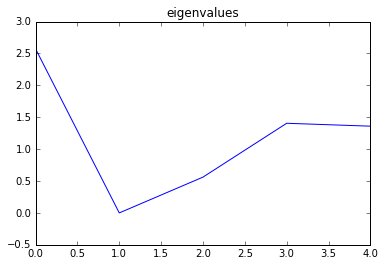

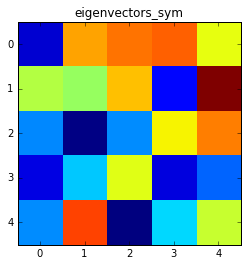

In [38]:
eigenvalues_sym, eigenvectors_sym = np.linalg.eig(Hsym)
plt.plot(eigenvalues_sym), plt.title('eigenvalues')
plt.figure()
plt.imshow(eigenvectors_sym, interpolation='nearest'), plt.title('eigenvectors_sym')
print 'Eigenvalues: \n', eigenvalues_sym
print ''
print 'Eigenvectors: \n', eigenvectors_sym

no more imaginary numbers! Or we can just use...

### Determinant
>The determinant of a square matrix, denoteddet(A), is a function mappingmatrices to real scalars. The determinant is equal to the product of all theeigenvalues of the matrix. The absolute value of the determinant can be thoughtof as a measure of how much multiplication by the matrix expands or contractsspace. If the determinant is 0, then space is contracted completely along at leastone dimension, causing it to lose all of its volume. If the determinant is 1, thenthe transformation is volume-preserving.

A non-symmetric square matrix:

In [46]:
print np.linalg.det(H)

-13.0


symmetric matrix:

In [47]:
print np.linalg.det(Hsym)

-1.15619319674e-16


### Singular value decomposition

Shapes:
u:  (5L, 5L)
s:  (5L,)
v:  (5L, 5L)


(<matplotlib.image.AxesImage at 0x7e2d908>,
 <matplotlib.text.Text at 0x7d71e48>)

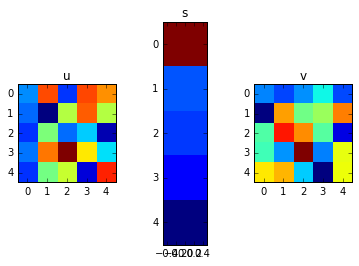

In [39]:
u, s, v = np.linalg.svd(H)

print 'Shapes:'
print 'u: ', u.shape
print 's: ', s.shape
print 'v: ', v.shape

fig, ax = plt.subplots(1, 3)
ax[0].imshow(u, interpolation='nearest'), ax[0].set_title('u')
ax[1].imshow(s[:, np.newaxis], interpolation='nearest'), ax[1].set_title('s')
ax[2].imshow(v, interpolation='nearest'), ax[2].set_title('v')



### Trace operator

In [43]:
print H
print np.trace(H)

[[1 2 2 1 4]
 [4 2 3 1 2]
 [3 3 2 2 4]
 [1 4 3 1 2]
 [3 4 2 2 3]]
[1 2 2 1 3]
9
